In [37]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchmetrics as tm
import random
import os
import numpy as np
from sklearn.metrics import classification_report

In [38]:
def seed_everything(seed=42):
    """"
    Seed everything.
    """   
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    np.random.seed(seed)

In [39]:
seed_everything()

In [40]:
train_dataset = torchvision.datasets.MNIST(root="./data",train=True,download=True,transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root="./data",train=False,transform=transforms.ToTensor())

In [41]:
train_fold , val_fold = torch.utils.data.random_split(train_dataset,[50000,10000])

In [42]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, shuffle = True,batch_size = 128)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, shuffle = True,batch_size = 128)
train_fold_loader = torch.utils.data.DataLoader(dataset = train_fold, shuffle = True,batch_size = 128)
val_fold_loader = torch.utils.data.DataLoader(dataset = val_fold, shuffle = True,batch_size = 128)

In [43]:
print(train_loader)

In [44]:
dataiter = iter(train_loader)
data = next(dataiter)

In [45]:
data

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [46]:
imgs , label = data

In [47]:
label

tensor([6, 6, 1, 5, 9, 8, 7, 8, 5, 1, 2, 8, 6, 7, 1, 9, 4, 2, 8, 3, 1, 9, 9, 8,
        5, 1, 7, 9, 7, 7, 2, 8, 6, 2, 8, 6, 0, 8, 3, 0, 5, 9, 7, 2, 4, 8, 3, 6,
        6, 7, 4, 2, 4, 8, 8, 0, 7, 3, 0, 5, 9, 5, 2, 6, 9, 2, 1, 0, 6, 3, 1, 9,
        3, 4, 7, 3, 9, 6, 1, 6, 9, 5, 2, 9, 9, 4, 0, 8, 9, 7, 2, 9, 7, 8, 2, 4,
        7, 4, 5, 9, 3, 4, 3, 3, 8, 9, 4, 1, 2, 0, 2, 0, 7, 3, 1, 8, 2, 5, 3, 1,
        2, 5, 1, 0, 5, 4, 1, 7])

In [48]:
imgs.shape

torch.Size([128, 1, 28, 28])

In [49]:
imgs[1][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.1765, 0.3569, 0.3569, 0.2627, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [50]:
imgs[0][0][27][27]

tensor(0.)

In [51]:
len(label.unique())

10

6
6
1
5
9
8
7
8
5
1


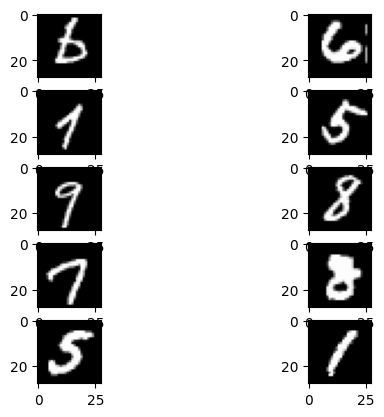

In [52]:
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(imgs[i][0],cmap="gray")
    print(label[i].item())
plt.show()

1 hidden layered net

In [53]:
class NeuralNet1(nn.Module):
    def __init__(self,input_size,hidden_size,output_size) -> None:
        super().__init__()
        self.linear1 = nn.Linear(input_size,hidden_size) # input = 784, hidden = 384
        self.hidden_activation1_relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size,output_size) # hidden = 384 , output = 10
        self.out_act = nn.LogSoftmax(dim=1)

    def forward(self,X):
        out = self.linear1(X)
        out = self.hidden_activation1_relu(out)
        out = self.linear2(out)
        out = self.out_act(out)
        return out


2 hidden layered net

In [54]:
class NeuralNet2(nn.Module):
    def __init__(self,input_size,hidden_size1,hidden_size2,output_size) -> None:
        super().__init__()
        self.linear1 = nn.Linear(input_size,hidden_size1) # input = 784, hidden = 384
        self.hidden_activation1_relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size1,hidden_size2) # hidden1 = 384 , hidden2 = 192
        self.hidden_activation2_relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.linear3 = nn.Linear(hidden_size2,output_size) # hidden2 = 192 , output = 10
        self.out_act = nn.LogSoftmax(dim=1)

    def forward(self,X):
        out = self.linear1(X)
        out = self.hidden_activation1_relu(out)
        out = self.linear2(out)
        out = self.hidden_activation2_relu(out)
        #out = self.dropout(out)
        out = self.linear3(out)
        out = self.out_act(out)
        return out


In [55]:
class NeuralNet3(nn.Module):
    def __init__(self):
        super().__init__()
        # hidden layers
        self.h1 = nn.Linear(28*28,512)
        self.h2 = nn.Linear(512,256)
        self.h3 = nn.Linear(256,128)
        self.h4 = nn.Linear(128,64)
        self.o = nn.Linear(64,10)

        # dropout
        self.dropout = nn.Dropout(p=0.2)
        # softmax
        self.softmax = nn.functional.log_softmax

    def forward(self,X):
        # with dropout
        # X = self.dropout(nn.functional.relu(self.h1(X)))
        # X = self.dropout(nn.functional.relu(self.h2(X)))
        # X = self.dropout(nn.functional.relu(self.h3(X)))
        # X = self.dropout(nn.functional.relu(self.h4(X)))

        # X = self.softmax(self.o(X),dim=1)

        # # without dropout
        

        X = nn.functional.relu(self.h1(X))
        X = nn.functional.relu(self.h2(X))
        X = nn.functional.relu(self.h3(X))
        X = nn.functional.relu(self.h4(X))

        X = self.softmax(self.o(X),dim=1)
        
        return X 

In [56]:
model_5layered = NeuralNet3()

criterion = nn.NLLLoss()

optimizer = torch.optim.Adam(model_5layered.parameters(), lr = 0.0015)

nn.sequiential(arastir)

In [66]:
class convolutionalNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolutional Layers
        conv1 = nn.Conv2d(1,4,3) #6-7 kanalli imagelar olabiliyo arastir.
        conv2 = nn.Conv2d(4,8,3) #stride da gec parametre olarak(size azalmasin diye)(butun parametreleri)
        conv3 = nn.Conv2d(8,16,3)

        #Fully Connected Layers

        fc1 = nn.Linear(16*16*16,1024) #16*16*16 calculated below
        fc2 = nn.Linear(1024,512) #
        fc3 = nn.Linear(512,128)
        fc4 = nn.Linear(128,10)

        #pool
        pool = nn.MaxPool2d(2,2)

        #Activation

        relu = nn.ReLU()


    def forward(self,X):

        # convolutional layer
        out = self.pool(self.relu(self.conv1(X)))
        out = self.pool(self.relu(self.conv2(out)))
        out = self.pool(self.relu(self.conv3(out)))

        #vectorizing before fully connected layer
        out.view(-1,16*16*16) #pytorchun flatten fonksiyonu var onu kullansan daha iyi

        # Fully connected layer
        out = self.relu(self.fc1(out))
        out = self.relu(self.fc2(out))
        out = self.relu(self.fc3(out))
        out = nn.functional.log_softmax(self.fc4(out),dim=1)
        
        return out

Training loop 5 layered 

In [58]:
# for epoch in range(10):
#     for images, labels in train_loader:
        

#         optimizer.zero_grad()
#         #forward pass
#         images = images.reshape(-1,28*28)

#         outputs = model_5layered.forward(images)
#         loss = criterion(outputs, labels)

#         #backward pass

#         loss.backward()
#         optimizer.step()
#     print(loss)


Fully connected layer input shape 

In [59]:
conv1 = nn.Conv2d(1,4,5)
conv2 = nn.Conv2d(4,8,5)
conv3 = nn.Conv2d(8,16,5)

In [60]:
dummy = conv1(imgs[0])
print(dummy.shape)
dummy = conv2(dummy)
print(dummy.shape)
dummy = conv3(dummy)
print(dummy.shape)

torch.Size([4, 24, 24])
torch.Size([8, 20, 20])
torch.Size([16, 16, 16])


In [61]:
model = NeuralNet1(28*28,384,len(label.unique()))

In [62]:
model2 = NeuralNet2(28*28, 384, 192, len(label.unique()))

In [63]:
model3 = NeuralNet3()

In [67]:
convModel = convolutionalNeuralNet()

Loss and Optimizer

In [68]:
learning_rate = 0.0015
lossFunction = nn.NLLLoss()
optimizer = torch.optim.Adam(convModel.parameters(),lr = learning_rate)

ValueError: optimizer got an empty parameter list

In [474]:
print(len(train_loader) * train_loader.batch_size)

60032


In [475]:
metric = tm.classification.MulticlassAccuracy(num_classes=10)
metric2 = tm.classification.MulticlassF1Score(num_classes=10)
metric3 = tm.classification.MulticlassPrecision(num_classes=10)
metric4 = tm.classification.MulticlassRecall(num_classes=10)

In [449]:
for epoch in range(50):
    for i , (images,labels) in enumerate(train_fold_loader):

        images = images.reshape(-1,28*28)

        #forward pass
        outputs = model3.forward(images)    
        #print(outputs.shape)
        loss = lossFunction(outputs,labels)
        #print(labels.shape)

        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
    print("Epoch:",epoch+1)
    print("*************************\n")
    print("Loss:",loss.item())

    with torch.no_grad():
    
        for images,labels in val_fold_loader:
            images = images.reshape(-1,28*28)

            outputs = model3.forward(images)

            # _ , predictions = torch.max(outputs,1) #for cross entropy loss criterion

            ps = torch.exp(outputs) #for NLSS loss

            top_p, predictions = ps.topk(1, dim=1)
            predictions = predictions.reshape(predictions.shape[0])


            acc_test = metric(predictions,labels)
            f1_test = metric2(predictions,labels)
            precision_test = metric3(predictions,labels)
            recall_test = metric4(predictions,labels)


        acc_test = metric.compute()
        f1_test = metric2.compute()
        precision_test = metric3.compute()
        recall_test = metric4.compute()

        print("Accuracy: %{}".format(acc_test*100))
        print("F1 score: %{}".format(f1_test*100))
        print("Precision: %{}".format(precision_test*100))
        print("Recall: %{}".format(recall_test*100))

    # NLLloss without dropouts 5 layer adam optimizer
    # Accuracy: %99.54034423828125

    # CrossEntropyLoss without dropouts 5 layer adam optimizer
    # Accuracy: %98.64946746826172

    # CrossEntropyLoss with dropouts 5 layer adam optimizer
    # Accuracy: %97.92781066894531
    # acc_test = metric(predictions,labels)
    # f1_test = metric2(predictions,labels)
    # precision_test = metric3(predictions,labels)
    # recall_test = metric4(predictions,labels)

    # acc_test = metric.compute()
    # f1_test = metric2.compute()
    # precision_test = metric3.compute()
    # recall_test = metric4.compute()

    # print("Accuracy: %{}".format(acc_test*100))
    # print("F1 score: %{}".format(f1_test*100))
    # print("Precision: %{}".format(precision_test*100))
    # print("Recall: %{}\n".format(recall_test*100))
            


Epoch: 1
*************************

Loss: 0.1732713133096695
Accuracy: %94.9854736328125
F1 score: %94.96825408935547
Precision: %95.01183319091797
Recall: %94.9854736328125
Epoch: 2
*************************

Loss: 0.21396315097808838
Accuracy: %95.52027893066406
F1 score: %95.52471160888672
Precision: %95.56548309326172
Recall: %95.52027893066406
Epoch: 3
*************************

Loss: 0.024327687919139862
Accuracy: %95.8650131225586
F1 score: %95.86244201660156
Precision: %95.88444519042969
Recall: %95.8650131225586
Epoch: 4
*************************

Loss: 0.01012013666331768
Accuracy: %96.06883239746094
F1 score: %96.07501220703125
Precision: %96.10382843017578
Recall: %96.06883239746094
Epoch: 5
*************************

Loss: 0.018266666680574417
Accuracy: %96.28862762451172
F1 score: %96.2872543334961
Precision: %96.30538177490234
Recall: %96.28862762451172
Epoch: 6
*************************

Loss: 0.028583431616425514
Accuracy: %96.4847183227539
F1 score: %96.4834976196289


In [318]:
# with torch.no_grad():
    
#     for images,labels in val_fold_loader:
#         images = images.reshape(-1,28*28)

#         outputs = model3.forward(images)

#         # _ , predictions = torch.max(outputs,1) #for cross entropy loss criterion

#         ps = torch.exp(outputs) #for NLSS loss

#         top_p, predictions = ps.topk(1, dim=1)
#         predictions = predictions.reshape(predictions.shape[0])


#         acc_test = metric(predictions,labels)
#         f1_test = metric2(predictions,labels)
#         precision_test = metric3(predictions,labels)
#         recall_test = metric4(predictions,labels)


#     acc_test = metric.compute()
#     f1_test = metric2.compute()
#     precision_test = metric3.compute()
#     recall_test = metric4.compute()

#     print("Accuracy: %{}".format(acc_test*100))
#     print("F1 score: %{}".format(f1_test*100))
#     print("Precision: %{}".format(precision_test*100))
#     print("Recall: %{}".format(recall_test*100))

#     # NLLloss without dropouts 5 layer adam optimizer
#     # Accuracy: %99.54034423828125

#     # CrossEntropyLoss without dropouts 5 layer adam optimizer
#     # Accuracy: %98.64946746826172

#     # CrossEntropyLoss with dropouts 5 layer adam optimizer
#     # Accuracy: %97.92781066894531

Accuracy: %97.41030883789062
F1 score: %97.40196228027344
Precision: %97.40543365478516
Recall: %97.41030883789062


In [358]:
with torch.no_grad():
    for images,labels in train_fold_loader:
        images = images.reshape(-1,28*28)

        outputs = model3.forward(images)

        # _ , predictions = torch.max(outputs,1)

        ps = torch.exp(outputs) #for NLSS loss

        top_p, predictions = ps.topk(1, dim=1)
        predictions = predictions.reshape(predictions.shape[0])
        
        acc_train = metric(predictions,labels)
        f1_train = metric2(predictions,labels)
        precision_train = metric3(predictions,labels)
        recall_train = metric4(predictions,labels)

    acc_train = metric.compute()
    f1_train = metric2.compute()
    precision_train = metric3.compute()
    recall_train = metric4.compute()

    print("Accuracy: %{}".format(acc_train*100))
    print("F1 score: %{}".format(f1_train*100))
    print("Precision: %{}".format(precision_train*100))
    print("Recall: %{}".format(recall_train*100))

#NLLloss without dropouts 5 layer adam optimizer
# Accuracy: %99.6348648071289
# F1 score: %99.63404846191406
# Precision: %99.63380432128906
# Recall: %99.6348648071289

# CrossEntropyLoss without dropouts 5 layer adam optimizer
# Accuracy: %99.69036865234375
# F1 score: %99.69303894042969
# Precision: %99.69589233398438
# Recall: %99.69036865234375

# CrossEntropyLoss with dropouts 5 layer adam optimizer
# Accuracy: %99.0772476196289
# F1 score: %99.07633972167969
# Precision: %99.07820892333984
# Recall: %99.0772476196289
 

Accuracy: %97.9490737915039
F1 score: %97.95006561279297
Precision: %97.9522705078125
Recall: %97.9490737915039


In [476]:
for epoch in range(50):
    for i , (images,labels) in enumerate(train_loader):

        images = images.reshape(-1,28*28)

        #forward pass
        outputs = model3.forward(images)    
        #print(outputs.shape)
        loss = lossFunction(outputs,labels)
        #print(labels.shape)

        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
    print("Epoch:",epoch+1)
    print("*************************\n")
    print("Loss:",loss.item())

    # _ , predictions = torch.max(outputs,1) #for crossentropy loss
    
    ps = torch.exp(outputs) #for NLSS loss

    top_p, predictions = ps.topk(1, dim=1)
    predictions = predictions.reshape(predictions.shape[0])

    acc_test = metric(predictions,labels)
    f1_test = metric2(predictions,labels)
    precision_test = metric3(predictions,labels)
    recall_test = metric4(predictions,labels)

    acc_test = metric.compute()
    f1_test = metric2.compute()
    precision_test = metric3.compute()
    recall_test = metric4.compute()

    print("Accuracy: %{}".format(acc_test*100))
    print("F1 score: %{}".format(f1_test*100))
    print("Precision: %{}".format(precision_test*100))
    print("Recall: %{}\n".format(recall_test*100))

Epoch: 1
*************************

Loss: 0.11697583645582199
Accuracy: %97.23077392578125
F1 score: %97.05687713623047
Precision: %97.07070922851562
Recall: %97.23077392578125

Epoch: 2
*************************

Loss: 0.13035759329795837
Accuracy: %95.16203308105469
F1 score: %95.12704467773438
Precision: %95.13123321533203
Recall: %95.16203308105469

Epoch: 3
*************************

Loss: 0.04336622357368469
Accuracy: %96.47950744628906
F1 score: %96.46882629394531
Precision: %96.48422241210938
Recall: %96.47950744628906

Epoch: 4
*************************

Loss: 0.010170725174248219
Accuracy: %97.35874938964844
F1 score: %97.35128021240234
Precision: %97.35824584960938
Recall: %97.35874938964844

Epoch: 5
*************************

Loss: 0.17222152650356293
Accuracy: %96.75589752197266
F1 score: %96.73766326904297
Precision: %96.77285766601562
Recall: %96.75589752197266

Epoch: 6
*************************

Loss: 0.04342091083526611
Accuracy: %96.90876770019531
F1 score: %96.8942

In [477]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    false_indexes = list()

    y_preds = list()
    y_true = list()
    

    for images,labels in test_loader:
        images = images.reshape(-1,28*28)

        outputs = model3.forward(images)

        # _ , predictions = torch.max(outputs,1) #for cross entropy loss criterion

        ps = torch.exp(outputs) #for NLSS loss

        top_p, predictions = ps.topk(1, dim=1)
        predictions = predictions.reshape(predictions.shape[0])

        for i in predictions:
            y_preds.append(i.item())
        for i in labels:
            y_true.append(i.item())

        acc_test = metric(predictions,labels)
        f1_test = metric2(predictions,labels)
        precision_test = metric3(predictions,labels)
        recall_test = metric4(predictions,labels)


    acc_test = metric.compute()
    f1_test = metric2.compute()
    precision_test = metric3.compute()
    recall_test = metric4.compute()

    print("Accuracy: %{}".format(acc_test*100))
    print("F1 score: %{}".format(f1_test*100))
    print("Precision: %{}".format(precision_test*100))
    print("Recall: %{}".format(recall_test*100))

Accuracy: %98.8119125366211
F1 score: %98.80867767333984
Precision: %98.80622863769531
Recall: %98.8119125366211


In [478]:
with torch.no_grad():
    for images,labels in train_loader:
        images = images.reshape(-1,28*28)

        outputs = model3.forward(images)

        # _ , predictions = torch.max(outputs,1)

        ps = torch.exp(outputs) #for NLSS loss

        top_p, predictions = ps.topk(1, dim=1)
        predictions = predictions.reshape(predictions.shape[0])
        
        acc_train = metric(predictions,labels)
        f1_train = metric2(predictions,labels)
        precision_train = metric3(predictions,labels)
        recall_train = metric4(predictions,labels)

    acc_train = metric.compute()
    f1_train = metric2.compute()
    precision_train = metric3.compute()
    recall_train = metric4.compute()

    print("Accuracy: %{}".format(acc_train*100))
    print("F1 score: %{}".format(f1_train*100))
    print("Precision: %{}".format(precision_train*100))
    print("Recall: %{}".format(recall_train*100))


Accuracy: %99.74943542480469
F1 score: %99.7486801147461
Precision: %99.74797821044922
Recall: %99.74943542480469


In [479]:
y_preds = np.array(y_preds)
y_true = np.array(y_true)

In [480]:
target_names = np.arange(10).astype("str")

In [481]:
print(classification_report(y_true,y_preds,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [482]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

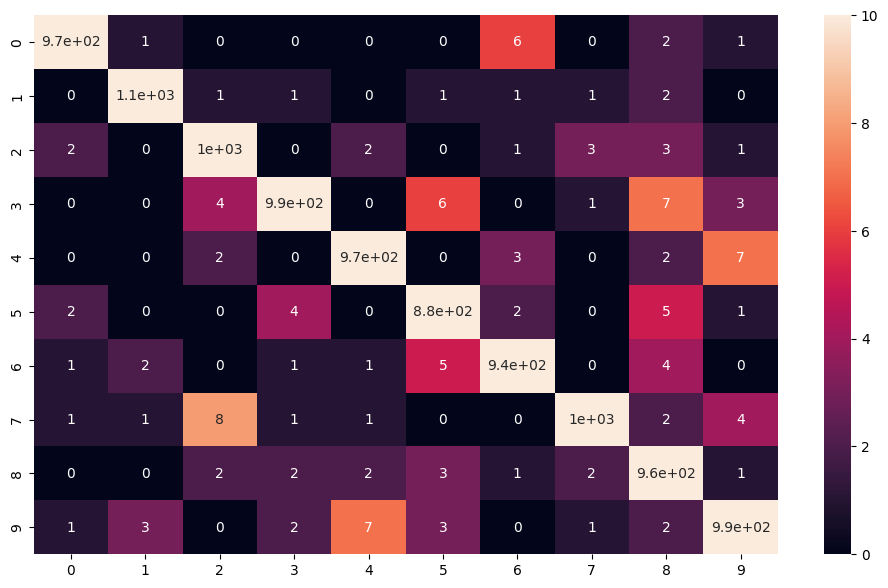

In [485]:
cf_matrix = confusion_matrix(y_true, y_preds)
df_cm = pd.DataFrame(cf_matrix , index = [i for i in target_names],
                     columns = [i for i in target_names])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True , vmin=0,vmax=10)
plt.savefig('output.png')